In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

from math import sqrt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

## 1. Load the Data

### 1.1 Load the Data

In [3]:
df=pd.read_csv('../data/us_disaster_declarations.csv')

### 1.2 Inspect the Data

In [4]:
df.shape

(64092, 23)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64092 entries, 0 to 64091
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   fema_declaration_string     64092 non-null  object
 1   disaster_number             64092 non-null  int64 
 2   state                       64092 non-null  object
 3   declaration_type            64092 non-null  object
 4   declaration_date            64092 non-null  object
 5   fy_declared                 64092 non-null  int64 
 6   incident_type               64092 non-null  object
 7   declaration_title           64092 non-null  object
 8   ih_program_declared         64092 non-null  int64 
 9   ia_program_declared         64092 non-null  int64 
 10  pa_program_declared         64092 non-null  int64 
 11  hm_program_declared         64092 non-null  int64 
 12  incident_begin_date         64092 non-null  object
 13  incident_end_date           55682 non-null  ob

In [6]:
df.head()

,fema_declaration_string,disaster_number,state,declaration_type,declaration_date,fy_declared,incident_type,declaration_title,ih_program_declared,ia_program_declared,...,incident_end_date,disaster_closeout_date,fips,place_code,designated_area,declaration_request_number,last_ia_filing_date,last_refresh,hash,id
0,DR-1-GA,1,GA,DR,1953-05-02T00:00:00Z,1953,Tornado,Tornado,0,1,...,1953-05-02T00:00:00Z,1954-06-01T00:00:00Z,13000,0,Statewide,53013,NaN,2023-03-18T13:22:03Z,48af1afcc4535aa910ddb5b85eebe047dc703a6b,da5c8f17-c28f-4c41-8e06-fa8efc85aa4a
1,DR-2-TX,2,TX,DR,1953-05-15T00:00:00Z,1953,Tornado,Tornado & Heavy Rainfall,0,1,...,1953-05-15T00:00:00Z,1958-01-01T00:00:00Z,48000,0,Statewide,53003,NaN,2023-03-18T13:22:03Z,6bbba411d294ec521683e36313c8da2992e8a857,b0b41f55-0d77-43ac-898c-3cc4a18231e6
2,DR-3-LA,3,LA,DR,1953-05-29T00:00:00Z,1953,Flood,Flood,0,1,...,1953-05-29T00:00:00Z,1960-02-01T00:00:00Z,22000,0,Statewide,53005,NaN,2023-03-18T13:22:03Z,5b2fa18b404bdcf0d3038cd17f1aa995d5412f48,9fd9401d-c76c-43c3-b42a-6a4ae5139ec0
3,DR-4-MI,4,MI,DR,1953-06-02T00:00:00Z,1953,Tornado,Tornado,0,1,...,1953-06-02T00:00:00Z,1956-02-01T00:00:00Z,26000,0,Statewide,53004,NaN,2023-03-18T13:22:03Z,403164346eb22263810402e8b67f1712f1574ad5,67324f38-1f00-4bbc-aeda-5194d1befad6
4,DR-5-MT,5,MT,DR,1953-06-06T00:00:00Z,1953,Flood,Floods,0,1,...,1953-06-06T00:00:00Z,1955-12-01T00:00:00Z,30000,0,Statewide,53006,NaN,2023-03-18T13:22:03Z,8c775d2ce843a8eba2417f9716ba5c75fe0e53f3,e3853916-c7a2-4557-ad8e-60a42d369a61


In [7]:
df.describe()

,disaster_number,fy_declared,ih_program_declared,ia_program_declared,pa_program_declared,hm_program_declared,fips,place_code,declaration_request_number
count,64092.000000,64092.000000,64092.000000,64092.000000,64092.000000,64092.000000,64092.000000,64092.000000,64092.000000
mean,2577.105364,2004.339996,0.168087,0.268161,0.932035,0.431489,31705.675638,96373.283733,35025.917306
std,1405.535733,14.785293,0.373946,0.443006,0.251687,0.495288,16642.418797,13940.282164,34956.137681
min,1.000000,1953.000000,0.000000,0.000000,0.000000,0.000000,1000.000000,0.000000,3.000000
25%,1316.000000,1997.000000,0.000000,0.000000,1.000000,0.000000,19183.000000,99029.000000,8151.000000
50%,3057.000000,2007.000000,0.000000,0.000000,1.000000,0.000000,30036.000000,99071.000000,20026.000000
75%,3546.000000,2018.000000,0.000000,1.000000,1.000000,1.000000,46075.000000,99123.000000,74028.000000
max,5457.000000,2023.000000,1.000000,1.000000,1.000000,1.000000,78030.000000,99507.000000,99159.000000


### 1.3 Clean the Data
- remove unnecessary columns
- identify and remove extra states

### 1.4 Encode Date Feature

In [4]:
# Create 'declaration_dtm' column to convert 'declaration_date' obj to datetime
df['declaration_dtm']=pd.to_datetime(df['declaration_date'], format='%Y-%m-%dT%H:%M:%SZ')

In [5]:
# Floor day of the month so that all incidents are reported on the same day monthly (1st of the month; for monthly counts)

# Create 'month' column to filter month from 'declaration_dtm'
df['month']=pd.to_datetime(df['declaration_dtm'], format='%b').dt.month

# Create 'year' column to filter year from 'declaration_dtm'
df['year']=pd.to_datetime(df['declaration_dtm'], format='%Y').dt.year

# Create 'date' column with year-month format of each incident (day assigned 1st of month)
df['date']=pd.to_datetime(df[['year', 'month']].assign(day=1))

# Create 'doy' column to extract the day of the year
df['doy'] = df.date.dt.day_of_year

df.head()

,fema_declaration_string,disaster_number,state,declaration_type,declaration_date,fy_declared,incident_type,declaration_title,ih_program_declared,ia_program_declared,...,declaration_request_number,last_ia_filing_date,last_refresh,hash,id,declaration_dtm,month,year,date,doy
0,DR-1-GA,1,GA,DR,1953-05-02T00:00:00Z,1953,Tornado,Tornado,0,1,...,53013,NaN,2023-03-18T13:22:03Z,48af1afcc4535aa910ddb5b85eebe047dc703a6b,da5c8f17-c28f-4c41-8e06-fa8efc85aa4a,1953-05-02,5,1953,1953-05-01,121
1,DR-2-TX,2,TX,DR,1953-05-15T00:00:00Z,1953,Tornado,Tornado & Heavy Rainfall,0,1,...,53003,NaN,2023-03-18T13:22:03Z,6bbba411d294ec521683e36313c8da2992e8a857,b0b41f55-0d77-43ac-898c-3cc4a18231e6,1953-05-15,5,1953,1953-05-01,121
2,DR-3-LA,3,LA,DR,1953-05-29T00:00:00Z,1953,Flood,Flood,0,1,...,53005,NaN,2023-03-18T13:22:03Z,5b2fa18b404bdcf0d3038cd17f1aa995d5412f48,9fd9401d-c76c-43c3-b42a-6a4ae5139ec0,1953-05-29,5,1953,1953-05-01,121
3,DR-4-MI,4,MI,DR,1953-06-02T00:00:00Z,1953,Tornado,Tornado,0,1,...,53004,NaN,2023-03-18T13:22:03Z,403164346eb22263810402e8b67f1712f1574ad5,67324f38-1f00-4bbc-aeda-5194d1befad6,1953-06-02,6,1953,1953-06-01,152
4,DR-5-MT,5,MT,DR,1953-06-06T00:00:00Z,1953,Flood,Floods,0,1,...,53006,NaN,2023-03-18T13:22:03Z,8c775d2ce843a8eba2417f9716ba5c75fe0e53f3,e3853916-c7a2-4557-ad8e-60a42d369a61,1953-06-06,6,1953,1953-06-01,152


In [6]:
# Create subset_df with reformatted 'date' and other necessary columns
subset_df=df[['date', 'incident_type', 'state', 'doy', 'year']]

# Create 'count' column to count the number of disasters reported based on 'date'
subset_df['mo_count'] = df.groupby(['date'])['date'].transform('count')

subset_df.head(10)

/tmp/ipykernel_26599/1266912894.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df['mo_count'] = df.groupby(['date'])['date'].transform('count')


,date,incident_type,state,doy,year,mo_count
0,1953-05-01,Tornado,GA,121,1953,3
1,1953-05-01,Tornado,TX,121,1953,3
2,1953-05-01,Flood,LA,121,1953,3
3,1953-06-01,Tornado,MI,152,1953,6
4,1953-06-01,Flood,MT,152,1953,6
5,1953-06-01,Tornado,MI,152,1953,6
6,1953-06-01,Flood,IA,152,1953,6
7,1953-06-01,Tornado,MA,152,1953,6
8,1953-06-01,Flood,TX,152,1953,6
9,1953-07-01,Fire,NH,182,1953,1


### 1.5 Time Axis Regularization

In [8]:
# Check if dtm axis is regular 

# Create dtm_df where index is set to 'date'
dtm_df=subset_df.set_index('date')

# Take the difference across the dtm index
diff=np.diff(dtm_df.index.to_numpy())

# Check that all of the differences are equal
equally_spaced=np.all(diff==diff[0])

print(f'Datetime axis is regular: {equally_spaced}')
dtm_df.head()

Datetime axis is regular: False


,incident_type,state,doy,year,mo_count
date,,,,,
1953-05-01,Tornado,GA,121,1953,3
1953-05-01,Tornado,TX,121,1953,3
1953-05-01,Flood,LA,121,1953,3
1953-06-01,Tornado,MI,152,1953,6
1953-06-01,Flood,MT,152,1953,6


In [11]:
# Resample the time series data based on months - get mean monthly count 
resampled_df=dtm_df.mo_count.resample('M').mean() 

resampled_df.head()

/tmp/ipykernel_26599/2906999945.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  resampled_df=dtm_df.mo_count.resample('M').mean()


date
1953-05-31    3.0
1953-06-30    6.0
1953-07-31    1.0
1953-08-31    NaN
1953-09-30    NaN
Freq: ME, Name: mo_count, dtype: float64

In [12]:
# Check if new resampled_df dtm axis is regular 

# Take the difference across the dtm index
diff=np.diff(resampled_df.index.to_numpy())

# Check that all of the differences are equal
equally_spaced=np.all(diff==diff[0])

print(f'Datetime axis is regular: {equally_spaced}')

Datetime axis is regular: False


## 2. EDA

### 2.1 Explore the Data

In [16]:
# Examine types of disasters
disaster_types=subset_df['incident_type'].unique()
print("Types of Disasters reported:\n\n", disaster_types)
print("Occurrences:\n\n",df['incident_type'].value_counts())

Types of Disasters reported:

 ['Tornado' 'Flood' 'Fire' 'Other' 'Earthquake' 'Hurricane'
 'Volcanic Eruption' 'Severe Storm' 'Toxic Substances' 'Typhoon' 'Drought'
 'Dam/Levee Break' 'Snowstorm' 'Severe Ice Storm' 'Freezing'
 'Coastal Storm' 'Fishing Losses' 'Mud/Landslide' 'Human Cause'
 'Terrorist' 'Tsunami' 'Chemical' 'Biological' 'Tropical Storm'
 'Winter Storm']
Occurrences:

 incident_type
Severe Storm         17490
Hurricane            13045
Flood                10693
Biological            7857
Snowstorm             3707
Fire                  3615
Severe Ice Storm      2942
Tornado               1569
Drought               1292
Coastal Storm          637
Other                  307
Freezing               301
Earthquake             228
Typhoon                130
Tropical Storm          54
Volcanic Eruption       51
Winter Storm            43
Fishing Losses          42
Mud/Landslide           37
Dam/Levee Break         13
Toxic Substances         9
Tsunami                  9
Chemic

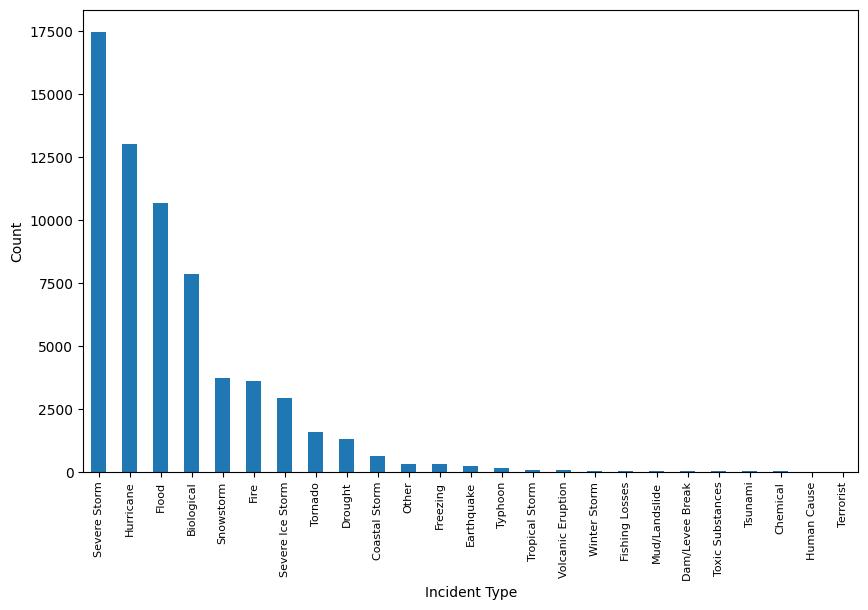

In [ ]:
# Bar plot: total count of each type of disaster

# Extract the counts for each state
type_count=subset_df['incident_type'].value_counts(ascending=False)

# Set the size of the plot
plt.figure(figsize=(10, 6))

# Plot the bar plot
type_count.plot(kind='bar')

# Set title and labels
plt.xlabel('Incident Type')
plt.ylabel('Count')

# Rotate x-axis labels for better readability and increase font size
plt.xticks(rotation=90, fontsize=8)

# Show plot
plt.show()

Severe storms, hurricanes, and floods are the most common types of disaster reported, at over 10K occurrences each.

In [35]:
# Examine locations of disasters (state level)
disaster_loc=subset_df['state'].unique()
print("Location of Disasters reported:\n\n", disaster_loc)
print("Occurrences:\n\n",df['state'].value_counts())

Location of Disasters reported:

 ['GA' 'TX' 'LA' 'MI' 'MT' 'IA' 'MA' 'NH' 'FL' 'AK' 'MS' 'CA' 'NV' 'SD'
 'WV' 'RI' 'ME' 'CT' 'NY' 'NM' 'SC' 'NC' 'IN' 'HI' 'CO' 'KS' 'OK' 'NJ'
 'PA' 'OR' 'WA' 'ID' 'OH' 'PR' 'KY' 'VA' 'MO' 'AR' 'MN' 'ND' 'IL' 'NE'
 'AL' 'MD' 'DE' 'GU' 'TN' 'FM' 'WY' 'VT' 'VI' 'WI' 'AS' 'AZ' 'MP' 'UT'
 'MH' 'DC' 'PW']
Occurrences:

 state
TX    5173
MO    2704
KY    2583
VA    2524
LA    2493
OK    2474
FL    2352
GA    2278
NC    2096
PR    1987
MS    1906
IA    1848
KS    1759
AL    1665
TN    1605
CA    1599
AR    1593
MN    1563
NY    1503
NE    1485
IN    1451
SD    1430
ND    1359
IL    1283
OH    1281
PA    1239
WV    1232
ME    1019
WA     979
SC     947
WI     892
MI     796
CO     646
NJ     625
MT     605
OR     586
NM     514
MD     448
MA     398
ID     361
VT     338
AZ     335
AK     318
NH     301
NV     274
CT     255
UT     249
WY     128
RI     114
HI     100
VI      80
AS      76
MP      63
DE      53
MH      53
FM      31
DC      23
GU      19
PW    

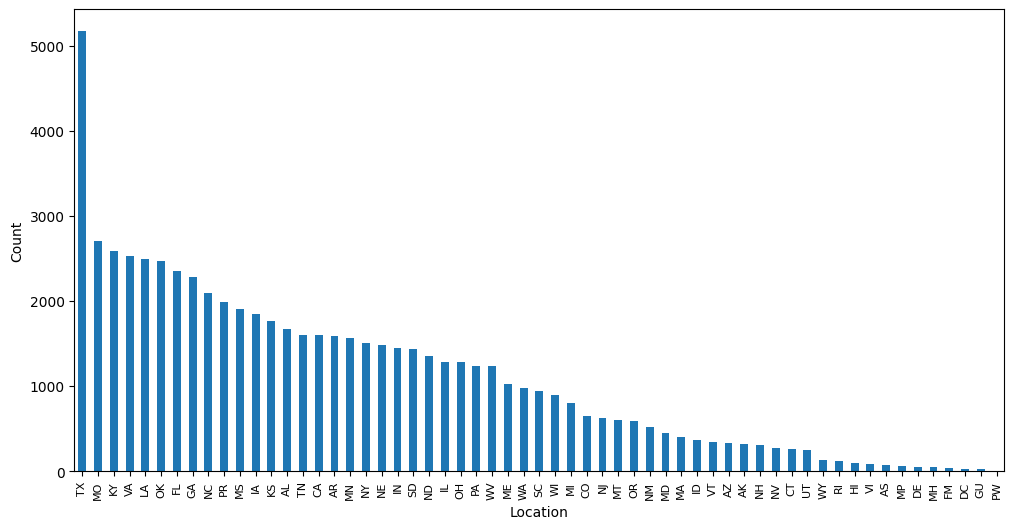

In [36]:
# Bar plot: total count of disaster occurrences at each location

# Extract the counts for each state
loc_count=subset_df['state'].value_counts(ascending=False)

# Set the size of the plot
plt.figure(figsize=(12, 6))

# Plot the bar plot
loc_count.plot(kind='bar')

# Set title and labels
plt.xlabel('Location')
plt.ylabel('Count')

# Rotate x-axis labels for better readability and increase font size
plt.xticks(rotation=90, fontsize=8)

# Show plot
plt.show()

TX reports a significantly higher number of disasters than any other location.

In [39]:
# Examine the number of disasters annually
disaster_yr=subset_df['year'].unique()
print("Year of Disaster report:\n\n", disaster_yr)
print("Occurrences:\n\n",df['year'].value_counts())

Year of Disaster report:

 [1953 1954 1955 1956 1957 1958 1959 1960 1961 1962 1963 1964 1965 1966
 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980
 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994
 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008
 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021 2022
 2023]
Occurrences:

 year
2020    9712
2005    4736
2011    2690
2008    2300
2021    1964
        ... 
1953      13
1961      12
1960      12
1959       7
1958       7
Name: count, Length: 71, dtype: int64


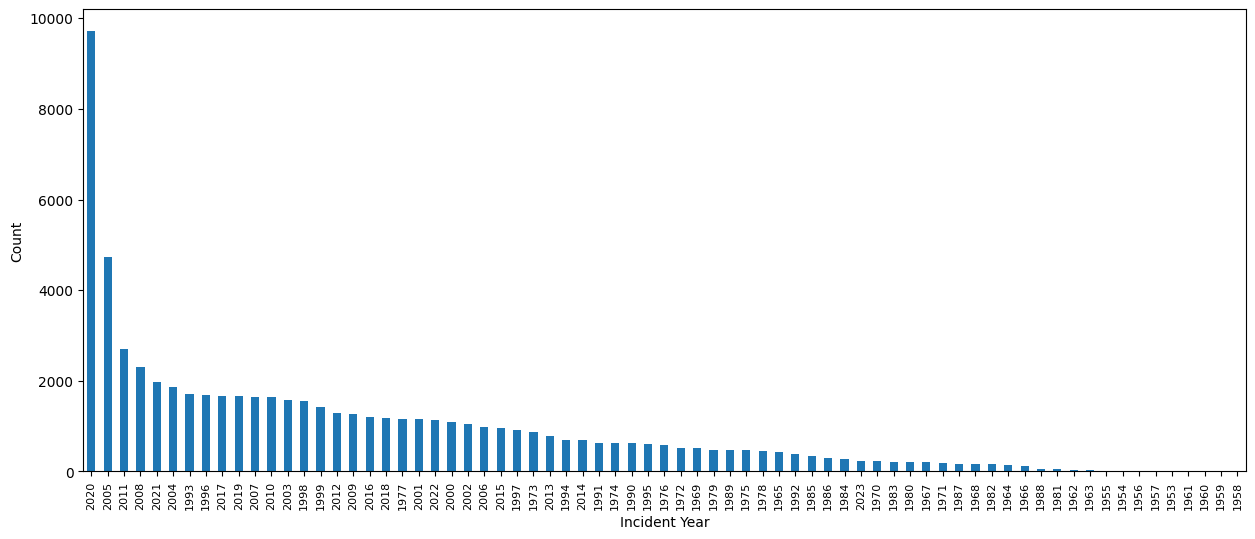

In [41]:
# Bar plot: total count of disaster occurrences each year

# Extract the counts for each state
yr_count=subset_df['year'].value_counts(ascending=False)

# Set the size of the plot
plt.figure(figsize=(15, 6))

# Plot the bar plot
yr_count.plot(kind='bar')

# Set title and labels
plt.xlabel('Incident Year')
plt.ylabel('Count')

# Rotate x-axis labels for better readability and increase font size
plt.xticks(rotation=90, fontsize=8)

# Show plot
plt.show()

2020 and 2005 had very high numbers of disasters reported, at just under 10K and just under 5K, respectively. All other years had under 3K disasters reported. 2020 is likely due to COVID, but both years should be investigated more thoroughly. 

In [42]:
# Examine which states are prone to which disaster types
state_type=subset_df[['state','incident_type']].groupby('state').describe()
state_type['incident_type'].sort_values(by='count',ascending=False).head(10)

,count,unique,top,freq
state,,,,
TX,5173,11,Hurricane,1303
MO,2704,8,Severe Storm,1339
KY,2583,10,Severe Storm,999
VA,2524,11,Hurricane,877
LA,2493,11,Hurricane,1364
OK,2474,9,Severe Storm,1005
FL,2352,11,Hurricane,1219
GA,2278,10,Hurricane,905
NC,2096,10,Hurricane,1304


In [43]:
# Examine states hit most frequently by one type of disaster
state_type['incident_type'].sort_values(by='freq',ascending=False)['freq'].head(10)

state
LA    1364
MO    1339
NC    1304
TX    1303
FL    1219
KS    1030
PR    1024
OK    1005
KY     999
GA     905
Name: freq, dtype: object

In [44]:
# Examine states at highest risk
state_risk=subset_df[['state','incident_type']].groupby('state').count()
state_risk.reset_index(inplace=True)
state_risk=state_risk.sort_values(by='incident_type',ascending=False).head(10)
state_risk

,state,incident_type
50,TX,5173
28,MO,2704
20,KY,2583
52,VA,2524
21,LA,2493
41,OK,2474
10,FL,2352
12,GA,2278
32,NC,2096
44,PR,1987


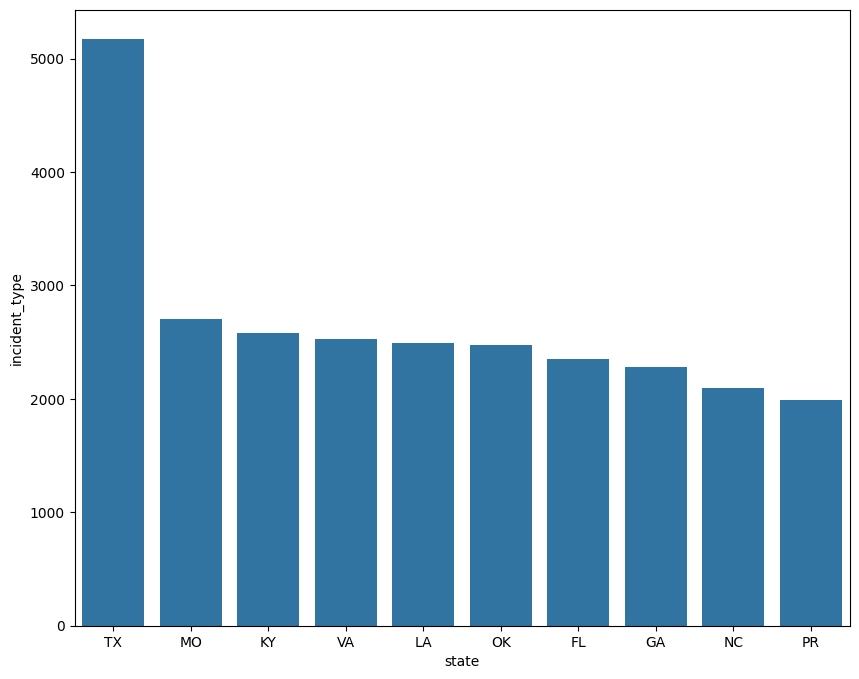

In [45]:
# Bar plot: states at highest risk
plt.figure(figsize=(10,8))
sns.barplot(x="state", y="incident_type", data=state_risk);

### 2.2 Baseline Model Performance

In [57]:
# Instantiate a linear model
linear_model=LinearRegression()

# Generate a uniform x variabel representing the time steps
x=np.array(range(len(subset_df))).reshape(-1, 1)

# Fit the model
fit_result=linear_model.fit(x, subset_df['counts'])

# Make predictions over the input domain
predictions=linear_model.predict(x)

# Add the linear model predictions back to the dataframe
subset_df['Linear model']=predictions

# Calcualte the root mean squared error
rmse=sqrt(mean_squared_error(subset_df['counts'], predictions))

# Save the result for later
rmse_results={'Linear model': rmse}

# Display the result for the user
print(f'Root mean square error: {rmse:.1f}')

Root mean square error: 1607.0


/tmp/ipykernel_6600/4026845882.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df['Linear model']=predictions


### 2.3 Missing and/or Extreme Values

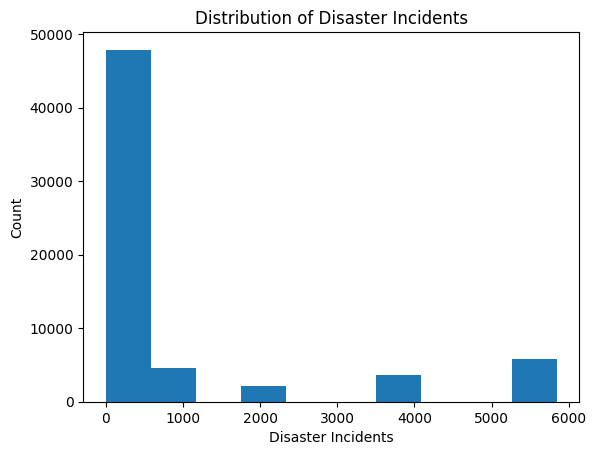

In [59]:
# Plot data as a historgram as you normally would for any numerical data
plt.title('Distribution of Disaster Incidents')
plt.hist(subset_df['counts'])
plt.xlabel('Disaster Incidents')
plt.ylabel('Count')
plt.show()

In [60]:
subset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64092 entries, 0 to 64091
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           64092 non-null  datetime64[ns]
 1   incident_type  64092 non-null  object        
 2   state          64092 non-null  object        
 3   doy            64092 non-null  int32         
 4   year           64092 non-null  int32         
 5   counts         64092 non-null  int64         
 6   Linear model   64092 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int32(2), int64(1), object(2)
memory usage: 2.9+ MB


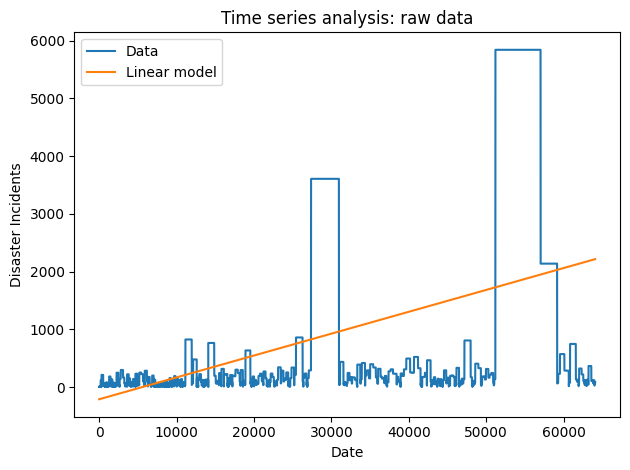

In [61]:
# Plot timeseries
# Plot the data over time and include the linear regression from above
plt.title('Time series analysis: raw data')
plt.plot(subset_df['counts'], label='Data')
plt.plot(subset_df['Linear model'], label='Linear model')
plt.xlabel('Date')
plt.ylabel('Disaster Incidents')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

### 2.4 Feature Selection

### 2.5 Feature Engineering